<a id="inicio"></a>
<br><br><br>
<h2><font color="#B51700" size=4>Práctica 5</font></h2>



<h1><font size=5>Análisis de datos de Cáncer de mama sobre base de datos Wisconsin</font></h1>

<br><br>
<div style="text-align: right">
<font color="#5E5E5E" size=3>Rosa Tárraga</font><br>
<font color="#5E5E5E" size=3>Desarrollo de Sistemas Ingeligentes</font><br>
<font color="#5E5E5E" size=3>Máster Universitario en Ingeniería Informática </font> - <font color="#B51700" size=3><b>UCLM</b></font>

</div>

---

<br>
En esta práctica he decidido analizar una base de datos que contiene información acerca pacientes con cáncer de mama. Gracias a este tipo de base de datos, junto al adecuado análisis de los resultados obtenidos, los científicos pueden ampliar sus conocimientos en el diagnóstico del dicho cáncer. 

En este trabajo se utilizarán diversas fuentes de información entre la que cabe destacar la base de datos propia de sklearn, de la que utilizaremos load_breast_cancer. Conforme vayamos avanzando en el desarrollo de la práctica, se irán realizando análisis de los datos visualizados a través de diferentes gráficos.


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Esta base de datos es propia de sklearn. Se pretende hacer un análisis de los datos de dicha base de datos que servirá de base para el Trabajo de Fin de máster.
</div>


In [83]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:60%}</style>"))

Lo primero que realizaremos será obtener los datos de cáncer de mama de la base de datos de SKLEAR llamada breast_cancer

In [84]:
import numpy
import pandas
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

Cancer es un objeto llamado Bunch propio de sklearn. Los bunch en sklearn son similares a los diccionarios, por lo que podremos obtener sus keys.

In [5]:
print(type(cancer))
print(cancer.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Nuestro diccionario contiene la keyword feature names, que se refiere a las características que contienen las diferentes entradas. Contiene un total de 30 tipos diferentes de características.

In [7]:
len(cancer['feature_names'])

30

Para poder trabajar de manera más cómoda con nuestros datos convertiremos nuestro dataset Bunch en un pandas.dataframe.
Se utiliza numpy.c_ para poder convertir de manera más sencilla los objetos de corte a la concatenación a lo largo del segundo eje.

In [8]:
#convert bunch to pandas
def convertPandas():
    data = numpy.c_[cancer.data, cancer.target]
    columns = numpy.append(cancer.feature_names, ["target"])
    return pandas.DataFrame(data, columns=columns)

In [9]:
cancerdf = convertPandas()

De esta manera tendremos en el dataframe pandas los diferentes datos de las características del dataset cancer.

In [10]:
cancerdf

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


Antes de "entrar en materia" con la base de datos, deberíamos analizar cuál de estos datos son nulos o son na.

In [11]:
display(cancerdf.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [12]:
display(cancerdf.isna().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<AxesSubplot:title={'center':'mean radius'}>,
        <AxesSubplot:title={'center':'mean texture'}>,
        <AxesSubplot:title={'center':'mean perimeter'}>,
        <AxesSubplot:title={'center':'mean area'}>,
        <AxesSubplot:title={'center':'mean smoothness'}>,
        <AxesSubplot:title={'center':'mean compactness'}>],
       [<AxesSubplot:title={'center':'mean concavity'}>,
        <AxesSubplot:title={'center':'mean concave points'}>,
        <AxesSubplot:title={'center':'mean symmetry'}>,
        <AxesSubplot:title={'center':'mean fractal dimension'}>,
        <AxesSubplot:title={'center':'radius error'}>,
        <AxesSubplot:title={'center':'texture error'}>],
       [<AxesSubplot:title={'center':'perimeter error'}>,
        <AxesSubplot:title={'center':'area error'}>,
        <AxesSubplot:title={'center':'smoothness error'}>,
        <AxesSubplot:title={'center':'compactness error'}>,
        <AxesSubplot:title={'center':'concavity error'}>,
        <AxesSubplot:tit

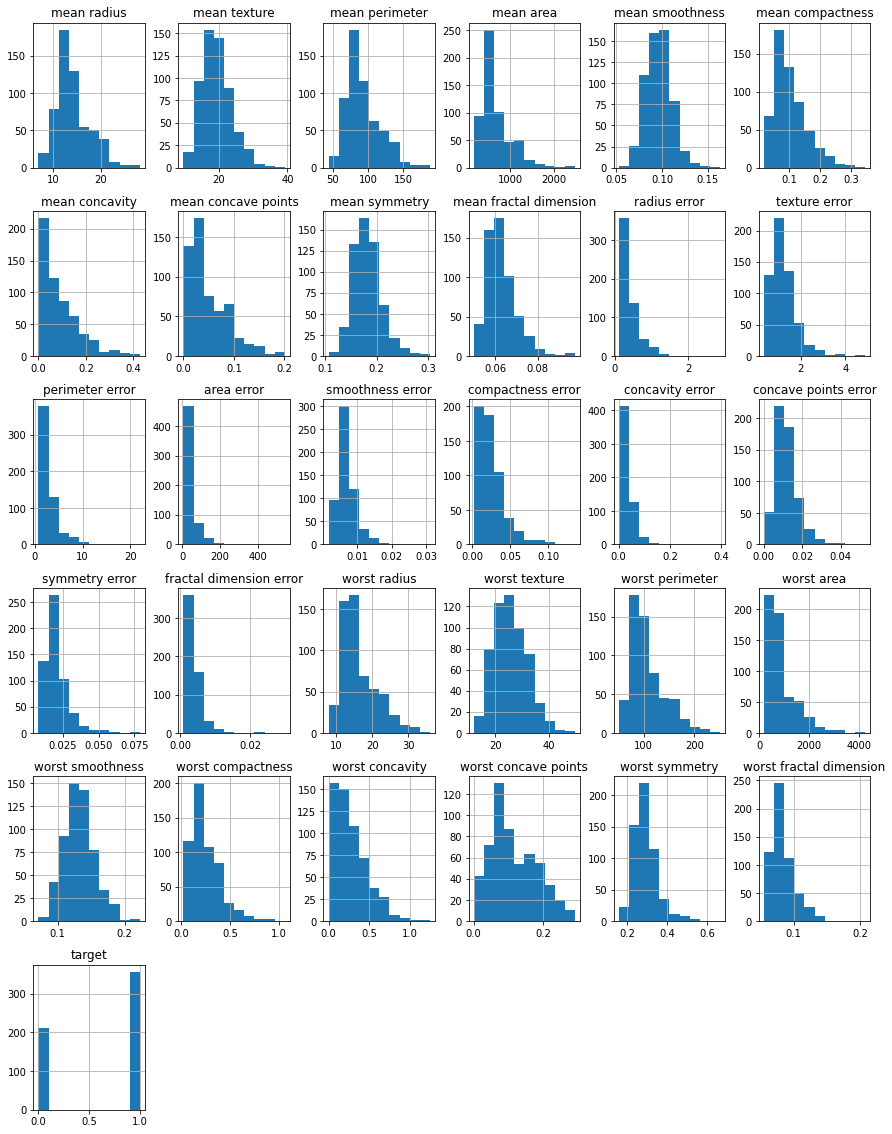

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
cancerdf.hist(ax = ax)

Podemos ver que ninguno de los registros es null ni na. 
Una vez identificadas las características del dataset pasaremos a contear el número de registros que son malignos frente a los benignos. Para ello utilizaremos la característica target.

In [15]:
def malignent_benign():

    counts = cancerdf.target.value_counts()
    print(counts)
    counts.index = "benign malignant".split()
    return counts

In [16]:
output = malignent_benign()

1.0    357
0.0    212
Name: target, dtype: int64


Gracias a la función anterior podemos observar que de nuestro dataset 357 registros identifican un cáncer maligno frente a 212 que es benigno. Es decir, un <b>62.7% de los registros son cancer maligno frente al 37.3% benigno</b>

A continuación para poder entrenar los datos de entrenamiento y probar posteriormente los datos de test, dividiremos el dataset en los datos (las características) y el label target que es la característica que intentaremos predecir.

Para ello tendremos el conjunto X que serán las labels, y el conjunto y que será el label target.

In [17]:
X = cancerdf[cancerdf.columns[:-1]]
y = cancerdf.target

In [18]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

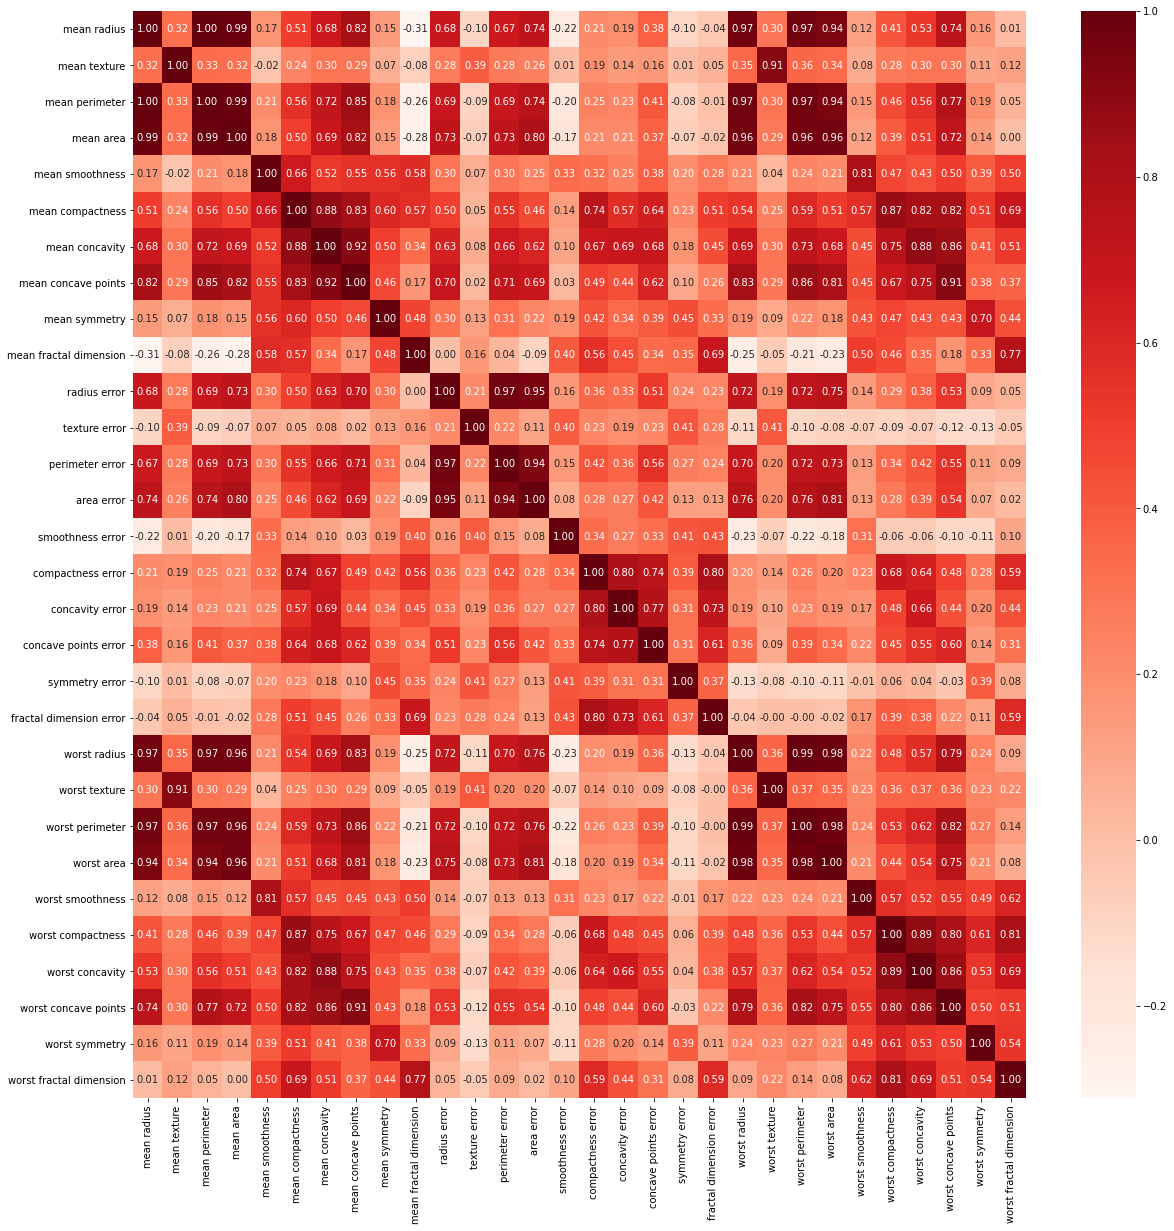

In [20]:
import matplotlib.pyplot as plt # for displaying our heatmap for analysis
import seaborn as sns # for creating a correlation heatmap

# Setting up and displaying our heatmap correlation
plt.figure(figsize=(20,20))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

El siguiente paso a realizar será la división de nuestros datos en datos de Training y datos de Test. Para ello utilizaremos el módulo train_test_spli de sklearn.

In [21]:
from sklearn.model_selection import train_test_split

# Divide into train and test (70% - 30%), wiith random_state=0
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=10)

In [22]:
print('N de muestras train: %d' % X_train.shape[0])
print(' - positivas (>50k): %d' % sum(y_train))
print(' - negativas (>50k): %d' % (int(len(y_train)) - sum(y_train)))

print('N de muestras test: %d' % X_test.shape[0])
print(' - positivas (>50k): %d' % sum(y_test))
print(' - negativas (>50k): %d' % (int(len(y_test)) - sum(y_test)))

N de muestras train: 398
 - positivas (>50k): 250
 - negativas (>50k): 148
N de muestras test: 171
 - positivas (>50k): 107
 - negativas (>50k): 64


Una vez dividido el conjunto de test y el conjunto de training, pasaremos a utilizar diferentes algoritmos

En primer lugar utilizaremos el algoritmo de K Vecinos. K-Nearest-Neighbor es un algoritmo basado en instancia de tipo supervisado de Machine Learning. Puede usarse para clasificar nuevas muestras (valores discretos) o para predecir (regresión, valores continuos).

Sirve esencialmente para clasificar valores buscando los puntos de datos “más similares” (por cercanía) aprendidos en la etapa de entrenamiento y haciendo conjeturas de nuevos puntos basado en esa clasificación.

# <font color="#e05c6e"> K VECINOS</font>

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier()

In [68]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(n_jobs=1)

In [72]:
knn.score(X_train, y_train)

0.9413145539906104

0.94 sería la score obtenida con los datos de entrenamiento. Vemos que los resultados son muy óptimos.

In [73]:
knn.score(X_test, y_test)

0.9370629370629371

Se puede observar que la puntuación del conjunto de entrenamiento es bastante similar a la del conjunto de prueba. Esto significa que no tenemos un problema de sobreajuste. La puntuación de 0,93 podría ser válida, pero también es cierto que en un entorno tan delicado como es el mundo de la oncología, estaríamos diciendo a 7 pacientes de 100 que no tienen cáncer. Podemos intentar mejorarla ajustando algunos de los hiperparámetros.

El clasificador KNN es una buena herramienta de clasificación cuando el tamaño de los datos y las características están bajo control, ya que de lo contrario el cálculo puede resultar muy caro. 

La precisión del clasificador se basa en la suposición de que los puntos similares están geométricamente cerca unos de otros, lo que no siempre es el caso. Consideremos, por ejemplo, los conjuntos de datos en forma de dos círculos concéntricos: el círculo interior es positivo y el exterior negativo. En este caso, inventar una nueva métrica de distancia puede ayudar hasta cierto punto. Pero el coste del cálculo aumenta muy rápidamente con la complejidad de la métrica de distancia. El coste también aumenta rápidamente con el número de características.

Pero es una forma muy elegante e intuitiva de clasificar cuando los datos son buenos.

# <font color="#e05c6e"> ALGORITMO SVM </font>

In [85]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [75]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.958041958041958


In [76]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9883720930232558
Recall: 0.9444444444444444


Los clasificadores SVM ofrecen una buena precisión y realizan una predicción más rápida en comparación, por ejemplo, con el algoritmo Naïve Bayes. También usan menos memoria porque utilizan un subconjunto de puntos de entrenamiento en la fase de decisión. SVM funciona bien con un claro margen de separación y con un espacio de alta dimensión.

SVM no es adecuado para grandes conjuntos de datos debido a su elevado tiempo de entrenamiento y también tarda más tiempo en entrenar en comparación con Naïve Bayes. Funciona mal con clases superpuestas y también es sensible al tipo de kernel utilizado.

In [77]:
# Support vector classifier 
from sklearn.svm import SVC 
svc_classifier = SVC() 
svc_classifier.fit(X_train, y_train) 
y_pred_scv = svc_classifier.predict(X_test) 
accuracy_score(y_test, y_pred_scv)

0.9370629370629371

# <font color="#e05c6e"> REGRESIÓN LOGÍSTICA </font>

In [87]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [88]:
# run model
lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [90]:
# view confusion matrix
from sklearn.metrics import confusion_matrix

lr_matrix = confusion_matrix(y_test, y_pred)
lr_matrix = pandas.DataFrame(lr_matrix, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_matrix

,Benign,Malignant
Benign,52,1
Malignant,5,85


In [91]:
# view accuracy
from sklearn.metrics import accuracy_score

lr_accuracy = accuracy_score(y_test, y_pred)
lr_accuracy

0.958041958041958

<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section31"></a>
### <font color="#e05c6e"> Diferentes parámetros </font>
<br>

Podemos intentar modificar diferentes parámetros de la regresión logísica y comprobar los diferentes resultados, tratando de averiguar en qué punto el algoritmo es más eficiente.
    <div class="alert alert-block alert-warning">

<i class="fa fa-exclamation-circle" aria-hidden="true"></i> 
Esta es una posible descomposición, hay diversas maneras de llegar a este punto.
</div>

In [93]:
# re-run the model with a C parameter value of 100
lr100 = LogisticRegression(C=100).fit(X_train, y_train)
y_pred100 = lr100.predict(X_test)

c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [95]:
# view confusion matrix
lr_matrix100 = confusion_matrix(y_test, y_pred100)
lr_matrix100 = pandas.DataFrame(lr_matrix100, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_matrix100

,Benign,Malignant
Benign,52,1
Malignant,6,84


In [96]:
# view accuracy
lr100_accuracy = accuracy_score(y_pred, y_pred100)
lr100_accuracy

0.993006993006993

In [97]:
# re-run the model with a C parameter value of 0.01
lr01 = LogisticRegression(C=0.01).fit(X_train, y_train)
y_pred01 = lr01.predict(X_test)

c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [99]:
# view confusion matrix
lr_matrix01 = confusion_matrix(y_test, y_pred01)
lr_matrix01 = pandas.DataFrame(lr_matrix01, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_matrix01

,Benign,Malignant
Benign,48,5
Malignant,5,85


In [100]:
# view accuracy
lr01_accuracy = accuracy_score(y_test, y_pred01)
lr01_accuracy

0.9300699300699301

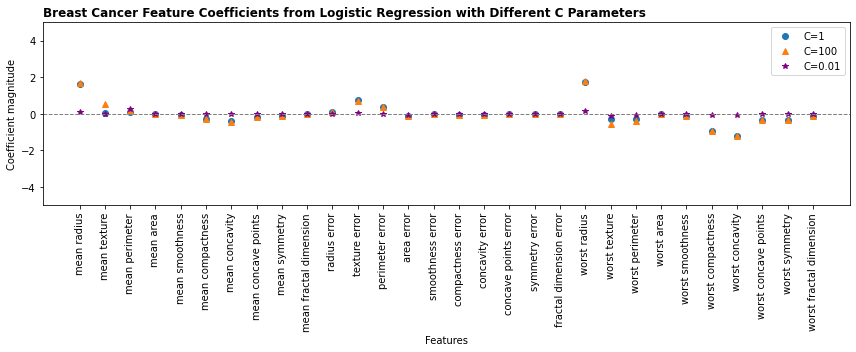

In [101]:
fig = plt.figure(figsize=(12,5))
plt.plot(lr.coef_.T, 'o', label='C=1')
plt.plot(lr100.coef_.T, '^', label='C=100')
plt.plot(lr01.coef_.T, '*', label='C=0.01', color='purple')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.axhline(0, color='gray', lw=1, linestyle='--')
plt.ylim(-5, 5)
plt.xlabel('Features')
plt.ylabel('Coefficient magnitude')
plt.legend()
plt.title('Breast Cancer Feature Coefficients from Logistic Regression with Different C Parameters', 
          loc='left', fontweight='bold')
plt.tight_layout()
plt.savefig('bc_coeffs_log_reg.png')

Cuanto menor es el valor de C, mayor será la regularización y más se acercarán los coeficientes a 0.



Utilizando la regresión logística, somos capaces de predecir con precisión el 92-98% (dependiendo del valor del parámetro C utilizado) de las instancias de clasificación del cáncer de mama como malignas o benignas.